<a href="https://colab.research.google.com/github/safaraalfia/Klasifikasi_Menggunakan_CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.6883 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5000 - loss: 0.6813 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.6781 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5625 - loss: 0.6752 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7500 - loss: 0.6723 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8750 - loss: 0.6694 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 9/10

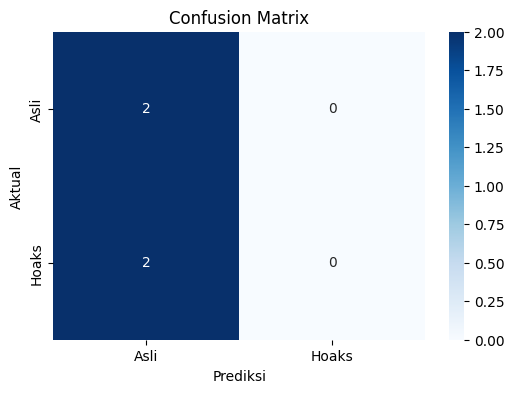

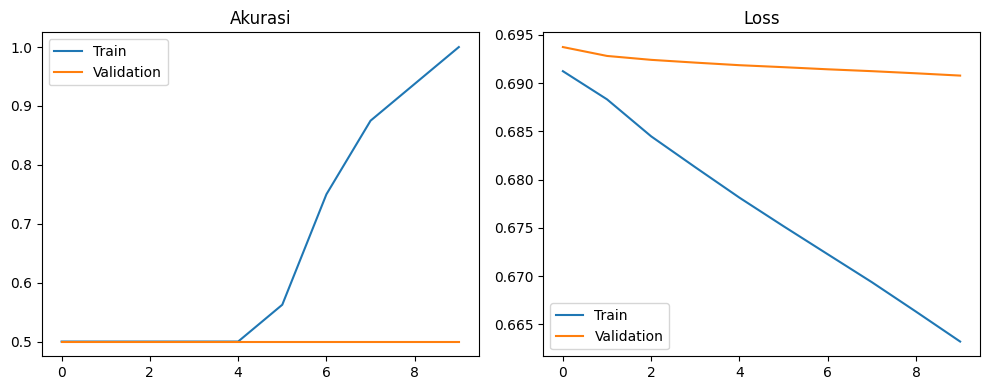

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

Berita: Presiden resmikan gedung baru di Jakarta
Prediksi: Asli (Probabilitas: 0.50)

Berita: Minyak kayu putih bisa obati kanker
Prediksi: Hoaks (Probabilitas: 0.51)

Berita: Gempa bumi melanda wilayah timur Indonesia
Prediksi: Asli (Probabilitas: 0.50)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# ========================================
# CNN untuk Klasifikasi Berita Hoaks / Asli
# ========================================

# 1. Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# 2. Dataset (20 Berita)
data = {
    'text': [
        'Pemerintah membagikan uang tunai gratis ke semua warga',
        'Vaksin COVID-19 menyebabkan mutasi DNA',
        'Presiden meresmikan jalan tol baru hari ini',
        'Ilmuwan menemukan cara hidup abadi',
        'Harga BBM naik mulai bulan depan',
        'Makan bawang putih bisa menyembuhkan kanker',
        'Polisi tangkap pelaku penipuan online',
        'NASA menemukan kehidupan di Mars',
        'Bank Indonesia keluarkan uang pecahan baru',
        'Rokok herbal lebih sehat dari rokok biasa',
        'Cuaca ekstrem diprediksi minggu depan',
        'Minum kopi bisa membuat umur lebih panjang',
        'Menteri Pendidikan umumkan kurikulum baru',
        'Gunung Semeru kembali erupsi',
        'Matahari terbit dari barat pertanda kiamat',
        'Pasar saham Indonesia naik drastis',
        'Minyak goreng bisa menyembuhkan flu',
        'TNI lakukan latihan militer gabungan',
        'Obat herbal bisa menyembuhkan COVID-19',
        'PLN bangun pembangkit listrik tenaga surya baru'
    ],
    'label': [1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0]
}
df = pd.DataFrame(data)

# 3. Tokenisasi
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', maxlen=20)
labels = np.array(df['label'])

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# 5. Model CNN
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=20),
    Conv1D(32, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Training Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 7. Evaluasi Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc:.2f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Asli', 'Hoaks'], yticklabels=['Asli', 'Hoaks'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# 9. Grafik Akurasi & Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 10. Klasifikasi Berita Baru
berita_baru = [
    'Presiden resmikan gedung baru di Jakarta',
    'Minyak kayu putih bisa obati kanker',
    'Gempa bumi melanda wilayah timur Indonesia'
]
seq = tokenizer.texts_to_sequences(berita_baru)
padded_seq = pad_sequences(seq, maxlen=20, padding='post')
pred = model.predict(padded_seq)

for i, teks in enumerate(berita_baru):
    status = "Hoaks" if pred[i][0] > 0.5 else "Asli"
    print(f"\nBerita: {teks}")
    print(f"Prediksi: {status} (Probabilitas: {pred[i][0]:.2f})")

# 11. Laporan Klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))